## Bank Personal Loan Campaign

### Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain: 
Banking

### Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:

+ ID: Customer ID
+ Age: Customer's age in completed years
+ Experience: #years of professional experience
+ Income: Annual income of the customer (\$000)
+ ZIP Code: Home Address ZIP
+ Family: Family size of the customer
+ CCAvg: Avg. spending on credit cards per month (\$000)
+ Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
+ Mortgage: Value of house mortgage if any. (\$000)
+ Personal Loan: Did this customer accept the personal loan offered in the last campaign?
+ Securities Account: Does the customer have a securities account with the bank?
+ CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
+ Online: Does the customer use internet banking facilities?
+ Credit card: Does the customer use a credit card issued by the bank?

### Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Step1: Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

#### Import libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#### Import datasets

In [2]:
customer = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
customer.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Check datatype

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Statistical summary

In [5]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
customer.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

#### Insights:<br>
In the US, ZIP Code is 5 digits format. Min of ZIP Code is 9307 meaning the data is incorrect.

In [7]:
customer[customer['ZIP Code'] < 10000]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


Note :<br>
The number of the customer whose ZIP Code is 4 digits is one. Since the number of incorrect data is only one and it is not easy to find the way to impute this data, we will just drop this data.

In [8]:
customer.drop(384, inplace=True)

In [9]:
customer[customer['ZIP Code'] < 10000]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


Note:<Br>
Customre data with 4 digit ZIP Code was successfully dropped.

#### Shape

In [10]:
customer.shape

(4999, 14)

#### null values

In [11]:
customer.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

Note: No null values

#### Incorrect imputation

In [12]:
customer[customer['Experience'] < 0].head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [13]:
customer[customer['Experience'] < 0]['ID'].count()

52

In [14]:
customer[customer['Experience'] < 0]['Age'].max()

29

In [15]:
customer[customer['Experience'] < 0]['Age'].min()

23

#### Insights:<br>
There are 52 customers whose "Experience" is negative. The age of those customers whose "Experience" is negative are all twenty's. Considerint that the attribute "Experience" is "#years of professional experience", the number in "Experience" attribute should be 0 or positive number.

In [16]:
round(customer[(customer['Age'] >= 20) & (customer['Age'] < 30)]['Age'].mean(),3)

27.068

In [17]:
customer[(customer['Age'] >= 20) & (customer['Age'] < 30)]['Age'].median()

27.0

In [18]:
customer[(customer['Age'] >= 20) & (customer['Age'] < 30)]['Age'].value_counts().head()

29    123
28    103
27     91
26     78
25     53
Name: Age, dtype: int64

Note:<br>
Mean, median, mode of the "Experience" of customers who are in twenties are 27.1, 27.0 and 29.0, respectively.<br>
Since mean and median is very similar number and we don't want to influence the distribution of the population, we will use median (27.0) to replace the negative number in "Experience".

In [19]:
customer['Experience'] = customer['Experience'].apply(lambda x: 27.0 if x < 0 else x)

In [20]:
customer[customer['Experience'] < 0]['Experience'].head()

Series([], Name: Experience, dtype: float64)

In [21]:
customer['Experience'].loc[89]
# This customer used to have negative number of experience

27.0

In [22]:
customer['Experience'].mean()

20.399479895979194

In [23]:
customer['Experience'].median()

21.0

In [24]:
customer['Experience'].describe()

count    4999.000000
mean       20.399480
std        11.274249
min         0.000000
25%        11.000000
50%        21.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Note:
Min is 0 and there were not much change in median and mean. Negative numbers were successfully replaced by median value.

### Step2: EDA: Study the data distribution in each attribute and target variable, share your findings

#### Number of unique in each column?

In [25]:
customer.nunique()

ID                    4999
Age                     45
Experience              44
Income                 162
ZIP Code               466
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### Insights:<br>
#Based on the number of unique values, from Personal Loan to CreditCard, Family and Education are categorical #variable.
#In addtion, based on the nature of the data, ZIP Code is also a categorical variable.

In [26]:
#customer['ZIP Code'] = customer['ZIP Code'].astype('category')
#customer['Family'] = customer['Family'].astype('category')
#customer['Education'] = customer['Education'].astype('category')

In [27]:
#customer[['Personal Loan','Securities Account','CD Account','Online','CreditCard']] = customer[['Personal Loan','Securities Account','CD Account','Online','CreditCard']].astype('category')


In [28]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4999 non-null   int64  
 1   Age                 4999 non-null   int64  
 2   Experience          4999 non-null   float64
 3   Income              4999 non-null   int64  
 4   ZIP Code            4999 non-null   int64  
 5   Family              4999 non-null   int64  
 6   CCAvg               4999 non-null   float64
 7   Education           4999 non-null   int64  
 8   Mortgage            4999 non-null   int64  
 9   Personal Loan       4999 non-null   int64  
 10  Securities Account  4999 non-null   int64  
 11  CD Account          4999 non-null   int64  
 12  Online              4999 non-null   int64  
 13  CreditCard          4999 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 745.8 KB


#### Number of people with zero mortgage?

In [29]:
customer[customer['Mortgage'] == 0]['ID'].count()

3461

In [30]:
customer['Mortgage'].value_counts()

0      3461
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

Note:<br>
3,462 out of 5,000 customers have zero mortgage.

#### Number of people with zero credit card spending per month?

In [31]:
customer[customer['CCAvg'] == 0.0]['ID'].count()

106

In [32]:
customer['CCAvg'].value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

Note:<br>
106 out of 5,000 customers' credit card spending per month are zero.

#### Value counts of all categorical columns.

In [33]:
customer['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
90813      1
92694      1
94598      1
94965      1
94087      1
Name: ZIP Code, Length: 466, dtype: int64

In [34]:
customer['Education'].value_counts()

1    2096
3    1500
2    1403
Name: Education, dtype: int64

In [35]:
customer['Personal Loan'].value_counts()

0    4519
1     480
Name: Personal Loan, dtype: int64

In [36]:
customer['Securities Account'].value_counts()

0    4477
1     522
Name: Securities Account, dtype: int64

In [37]:
customer['CD Account'].value_counts()

0    4697
1     302
Name: CD Account, dtype: int64

In [38]:
customer['Online'].value_counts()

1    2983
0    2016
Name: Online, dtype: int64

In [39]:
customer['CreditCard'].value_counts()

0    3530
1    1469
Name: CreditCard, dtype: int64

#### Univariate and Bivariate

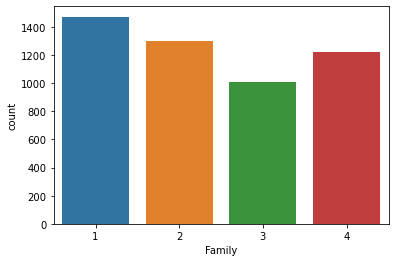

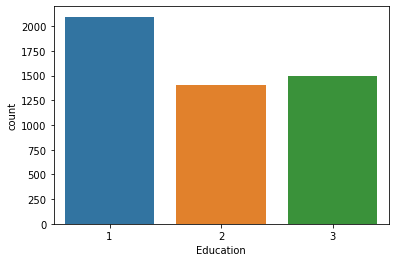

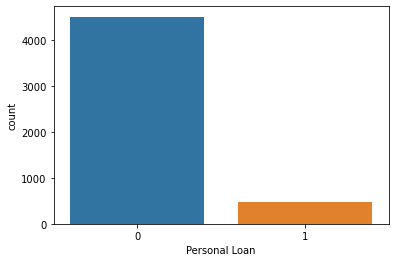

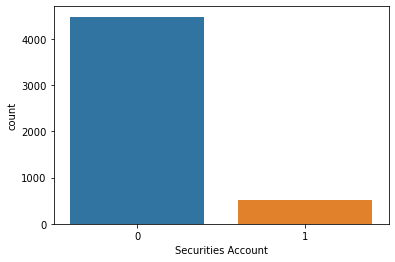

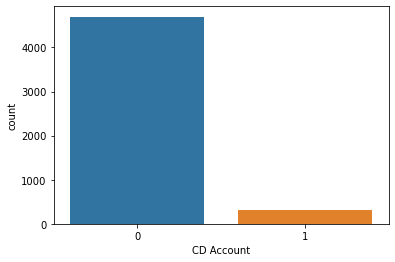

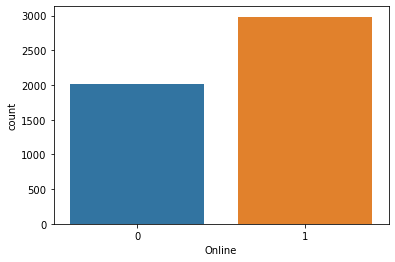

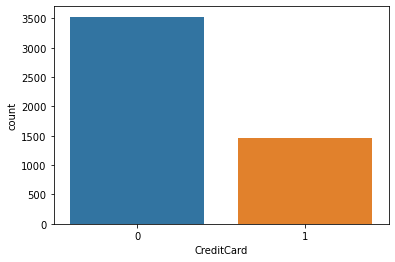

In [40]:
for i in ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    sns.countplot(customer[i])
    plt.show()  

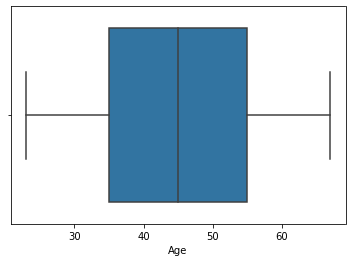

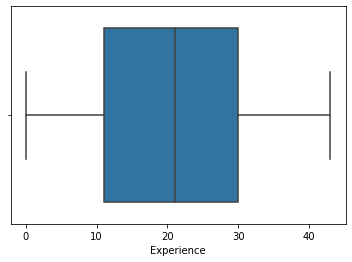

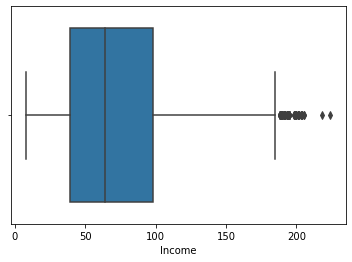

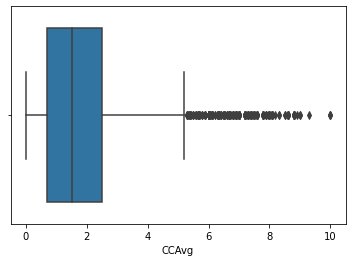

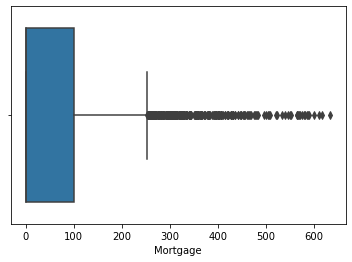

In [41]:
# boxplot for continous columns
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    sns.boxplot(customer[i])
    plt.show()

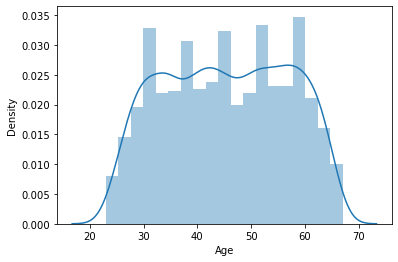

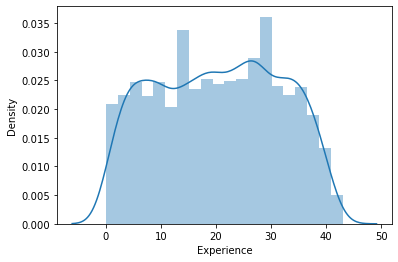

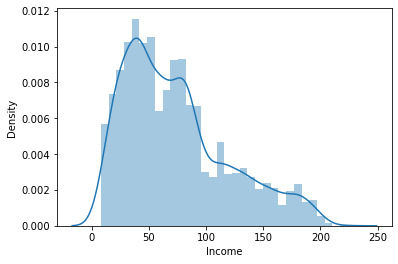

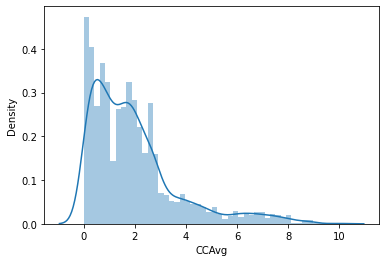

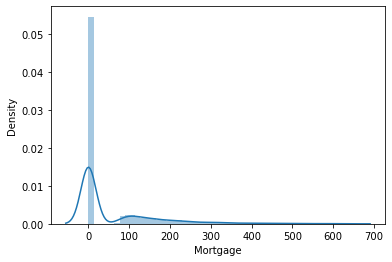

In [42]:
# distplot for continous columns
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    sns.distplot(customer[i])
    plt.show()

#### Insights:

As you can see in the visualized graph, Income, CCAvg and Mortgate are positively skewed. In addition, majority of Mortgage amount is zero.<br>
Since it is normal for bank to have skewed customer and we don't want to increase bias, we won't adjust the skew.

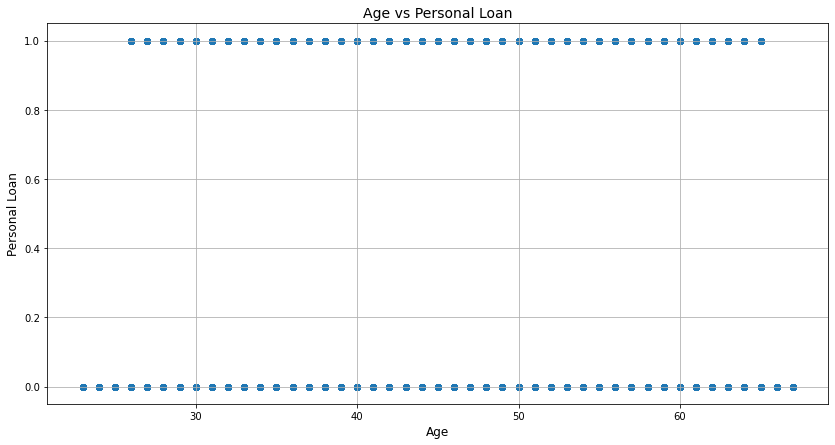

In [43]:
plt.figure(figsize=(14,7))
plt.scatter(customer['Age'], customer['Personal Loan'])
plt.title('Age vs Personal Loan', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Personal Loan', fontsize=12)
plt.grid(True)
plt.show()

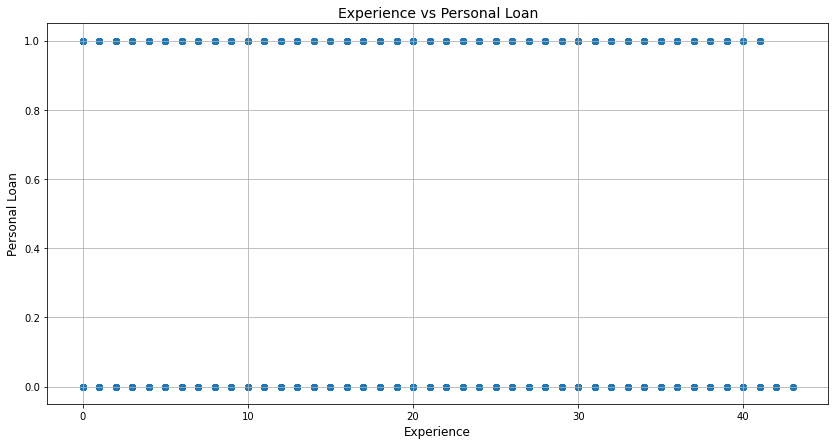

In [44]:
plt.figure(figsize=(14,7))
plt.scatter(customer['Experience'], customer['Personal Loan'])
plt.title('Experience vs Personal Loan', fontsize=14)
plt.xlabel('Experience', fontsize=12)
plt.ylabel('Personal Loan', fontsize=12)
plt.grid(True)
plt.show()

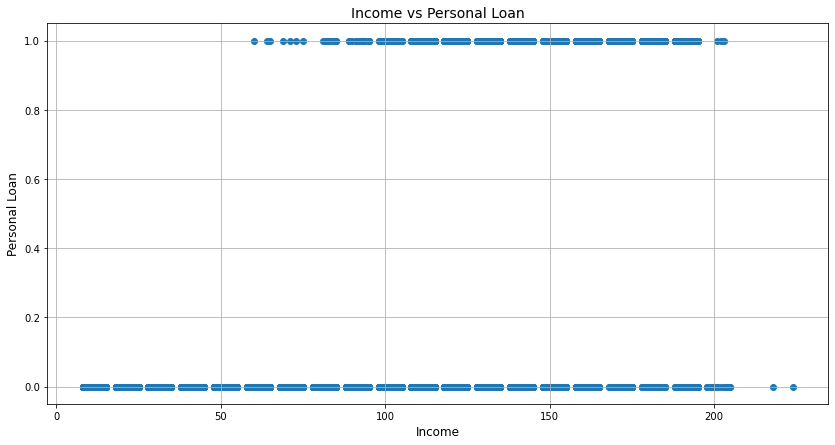

In [45]:
plt.figure(figsize=(14,7))
plt.scatter(customer['Income'], customer['Personal Loan'])
plt.title('Income vs Personal Loan', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Personal Loan', fontsize=12)
plt.grid(True)
plt.show()

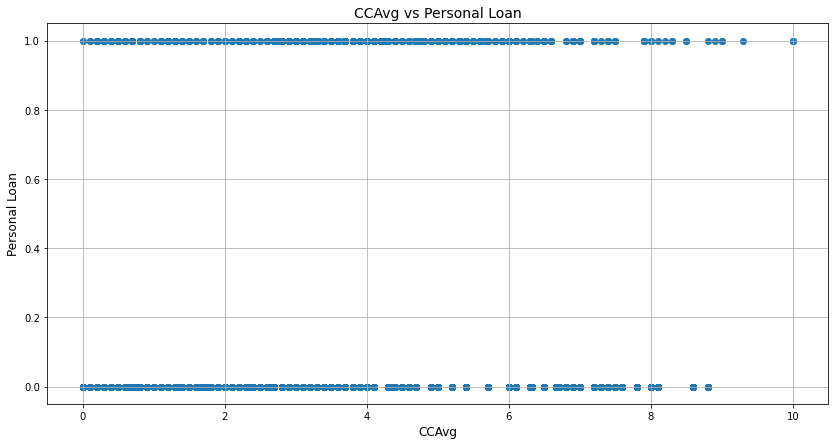

In [46]:
plt.figure(figsize=(14,7))
plt.scatter(customer['CCAvg'], customer['Personal Loan'])
plt.title('CCAvg vs Personal Loan', fontsize=14)
plt.xlabel('CCAvg', fontsize=12)
plt.ylabel('Personal Loan', fontsize=12)
plt.grid(True)
plt.show()

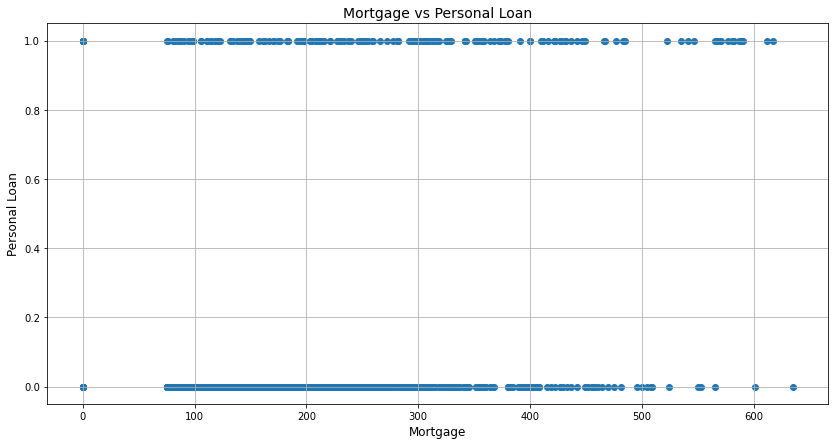

In [47]:
plt.figure(figsize=(14,7))
plt.scatter(customer['Mortgage'], customer['Personal Loan'])
plt.title('Mortgage vs Personal Loan', fontsize=14)
plt.xlabel('Mortgage', fontsize=12)
plt.ylabel('Personal Loan', fontsize=12)
plt.grid(True)
plt.show()

In [48]:
pd.crosstab(customer['Family'], customer['Personal Loan'], normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890254,0.109746


In [49]:
pd.crosstab(customer['Education'], customer['Personal Loan'], normalize='index')

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863333,0.136667


In [50]:
pd.crosstab(customer['Securities Account'], customer['Personal Loan'], normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.906187,0.093813
1,0.885057,0.114943


In [51]:
pd.crosstab(customer['CD Account'], customer['Personal Loan'], normalize='index')

Personal Loan,0,1
CD Account,,
0,0.927613,0.072387
1,0.536424,0.463576


In [52]:
pd.crosstab(customer['Online'], customer['Personal Loan'], normalize='index')

Personal Loan,0,1
Online,,
0,0.906250,0.093750
1,0.902447,0.097553


In [53]:
pd.crosstab(customer['CreditCard'], customer['Personal Loan'], normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902655,0.097345


#### Insights:
Based on the analysis above, following were noted:<br>
Online and Credit Card attribute do not have influence to the Personal Loan.<br>
Family, Education, Security Account have moderate influence to the Personal Loan.<br>
CD Account has high influence to the Personal Loan.

In [54]:
def plot_corr(df, size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, fontsize=7)
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8)
    for (i,j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.2f}'.format(z), ha='center',va='center')

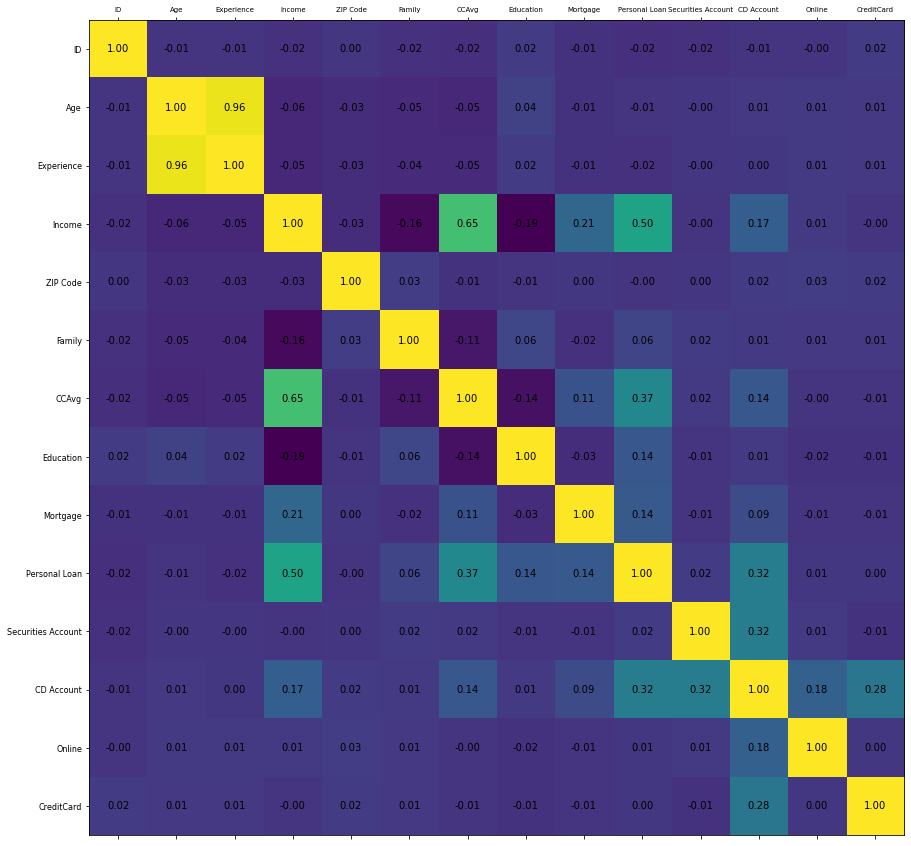

In [55]:
plot_corr(customer)

#### Insights:
Based on the correlation heatmap, Income, CCAvg and CD Account have higher correlation with Personal Loan.

#### Get data model ready

In [56]:
# Import libraries for the Logistic Regression model
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

In [57]:
## Define X and y variables

# Drop 'ID' from the data because it is unique value and it doesn't have correlation with 'Personal Loan'
# Drop 'ZIP Code' from the data because it has many unique value and it has low correlation with 'Personal Loan'

X = customer.drop(['Personal Loan', 'ID', 'ZIP Code'], axis=1)
y = customer['Personal Loan'].astype('category')

In [58]:
# Define a model
model = LogisticRegression(random_state=7)

In [59]:
# customer['ZIP Code'] = customer['ZIP Code'].astype('category')
# customer['Family'] = customer['Family'].astype('category')
# customer['Education'] = customer['Education'].astype('category')
# customer[['Personal Loan','Securities Account','CD Account','Online','CreditCard']] = customer[['Personal Loan','Securities Account','CD Account','Online','CreditCard']].astype('category')


### Step3. Split the data into training and test set in the ratio of 70:30 respectively

In [60]:
## Split the data into training and test set in the ratio of 70:30 respectively

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [61]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1335,50,24.0,180,1,1.7,1,0,0,0,1,1
4436,60,35.0,33,2,0.5,2,0,0,0,1,0
65,59,35.0,131,1,3.8,1,0,0,0,1,1
177,29,3.0,65,4,1.8,2,244,0,0,0,0
2271,60,34.0,101,3,4.4,1,0,0,0,1,1


In [62]:
customer.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
           dtype='int64', length=4999)

In [63]:
len(customer.index)

4999

In [64]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(customer.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(customer.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [65]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(customer.loc[customer['Personal Loan'] == 1]), (len(customer.loc[customer['Personal Loan'] == 1])/len(customer.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(customer.loc[customer['Personal Loan'] == 0]), (len(customer.loc[customer['Personal Loan'] == 0])/len(customer.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4519 (90.40%)

Training Personal Loan True Values    : 332 (9.49%)
Training Personal Loan False Values   : 3167 (90.51%)

Test Personal Loan True Values        : 148 (9.87%)
Test Personal Loan False Values       : 1352 (90.13%)



In [66]:
# Fit the data to the model
model.fit(x_train, y_train)

LogisticRegression(random_state=7)

### Step4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix

#### Use the Logistic Regression model to predict whether the customer will take a personal loan or not

In [67]:
# Predict the target variable on test data
y_predict = model.predict(x_test)

In [68]:
z = x_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
4996,30,4.0,15,4,0.4,1,85,0,0,1,0,0,0
4419,42,17.0,85,1,3.7,3,272,0,0,0,0,0,0
3000,40,14.0,164,1,4.3,2,0,0,0,0,0,1,1
4715,65,39.0,35,1,0.5,3,150,0,0,1,0,0,0
2264,35,11.0,9,4,0.7,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,63,38.0,32,1,1.5,2,0,0,0,0,0,0,0
3054,45,21.0,134,4,5.5,2,0,0,1,1,1,1,1
2074,52,27.0,81,1,1.3,3,293,0,0,0,1,0,0
1362,31,5.0,85,3,1.6,1,157,0,0,1,1,0,0


In [69]:
correct_prediction = z[(z['Observed Personal Loan']==z['Predicted Personal Loan'])]['Age'].count()
print("Number of Correct Prediction: ", correct_prediction)

Number of Correct Prediction:  1405


In [70]:
wrong_prediction = z[(z['Observed Personal Loan']!=z['Predicted Personal Loan'])]['Age'].count()
print("Number of Wrong Prediction: ", wrong_prediction)

Number of Wrong Prediction:  95


#### Draw a heatmap to display confusion matrix

In [71]:
## function to get confusion matrix in a proper format
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1], cmap="Blues", vmin=0, vmax=1500)
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show();

Confusion matrix -1


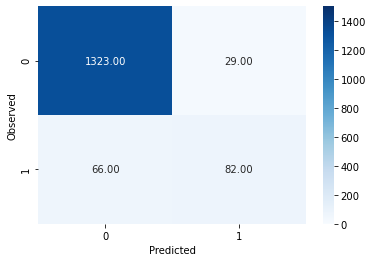

In [72]:
print("Confusion matrix -1")
draw_cm(y_test, y_predict)

In [73]:
## function to get confusion matrix in a proper format
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, labels=[1,0]).T
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[1,0], yticklabels=[1,0], cmap="Blues", vmin=0, vmax=1500)
    plt.ylabel('Predicted')
    plt.xlabel('Observed')
    plt.show();

[Confusion matrix -2]


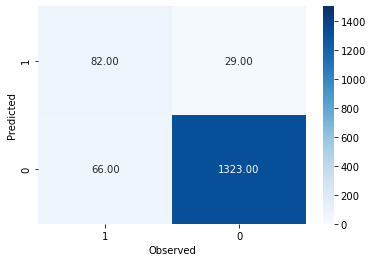

In [74]:
print("[Confusion matrix -2]")
draw_cm(y_test, y_predict)

In [75]:
cm = confusion_matrix(y_test, y_predict, labels=[1,0]).T
print(cm)

[[  82   29]
 [  66 1323]]


In [76]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
print("TP: ", TP)
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)

TP:  82
TN:  1323
FP:  29
FN:  66


In [77]:
# Precision
precision = TP / (TP+FP)
print("Precision: ",round(precision, 3))

Precision:  0.739


In [78]:
# Recall
recall = TP / (TP+FN)
print("Recall: ",round(recall, 3))

Recall:  0.554


In [79]:
# Specifity
specifity = TN / (TN+FP)
print("Specifity: ",round(specifity, 3))

Specifity:  0.979


In [80]:
# TPR (True Positive Rate)
tpr = TP / (TP+FN)
print("TPR (True Positive Rate): ",round(tpr, 3))

TPR (True Positive Rate):  0.554


In [81]:
# FPR (False Positive Rate)
fpr = FP / (FP+TN)
print("FPR (False Positive Rate): ",round(fpr, 3))

FPR (False Positive Rate):  0.021


In [82]:
# F1score
f1score = 2*precision*recall / (precision + recall)
print("F1score: ",round(f1score, 3))

F1score:  0.633


### Pattern A (sklearn, Threshold=0.5(default))

#### Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). 

In [83]:
print("Trainig accuracy", round(model.score(x_train,y_train),3))
print("Testing accuracy", round(model.score(x_test, y_test),3))
print()
print("Recall:", round(recall_score(y_test,y_predict),3))
print("Precision:", round(precision_score(y_test,y_predict),3))
print()
print("F1 Score:", round(f1_score(y_test,y_predict),3))
print()
print("Roc Auc Score:", round(roc_auc_score(y_test,y_predict),3))

a = round(f1_score(y_test,y_predict),3)

Trainig accuracy 0.937
Testing accuracy 0.937

Recall: 0.554
Precision: 0.739

F1 Score: 0.633

Roc Auc Score: 0.766


#### AUC ROC Curve

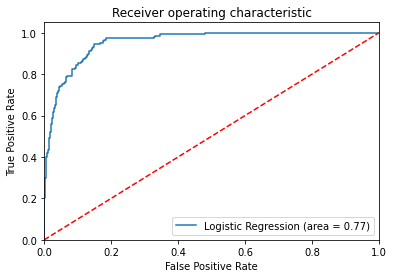

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Step5. Find out coefficients of all the attributes and show the output in a data frame with column names. For test data show all the rows where the predicted class is not equal to the observed class.

#### Coefficients and the output in a data frame with column names

In [85]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),4)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
8,CD Account,4.4481
10,CreditCard,1.7579
9,Online,1.4806
5,Education,1.0847
3,Family,0.3253
4,CCAvg,0.1570
7,Securities Account,0.1520
0,Age,0.1470
1,Experience,0.1243
2,Income,0.0398


In [86]:
print(model.coef_)

[[-1.46955385e-01  1.24345141e-01  3.98313470e-02  3.25284250e-01
   1.57005233e-01  1.08469372e+00  7.47783686e-04 -1.51998548e-01
   4.44807980e+00 -1.48060357e+00 -1.75790852e+00]]


In [87]:
# Observe the predicted and observed classes in a dataframe

z = x_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
4996,30,4.0,15,4,0.4,1,85,0,0,1,0,0,0
4419,42,17.0,85,1,3.7,3,272,0,0,0,0,0,0
3000,40,14.0,164,1,4.3,2,0,0,0,0,0,1,1
4715,65,39.0,35,1,0.5,3,150,0,0,1,0,0,0
2264,35,11.0,9,4,0.7,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,63,38.0,32,1,1.5,2,0,0,0,0,0,0,0
3054,45,21.0,134,4,5.5,2,0,0,1,1,1,1,1
2074,52,27.0,81,1,1.3,3,293,0,0,0,1,0,0
1362,31,5.0,85,3,1.6,1,157,0,0,1,1,0,0


#### All the rows where the predicted class is not equal to the observed class

In [88]:
correct_prediction = z[(z['Observed Personal Loan']==z['Predicted Personal Loan'])]['Age'].count()
print("Number of Correct Prediction: ", correct_prediction)

Number of Correct Prediction:  1405


In [89]:
wrong_prediction = z[(z['Observed Personal Loan']!=z['Predicted Personal Loan'])]['Age'].count()
print("Number of Wrong Prediction: ", wrong_prediction)

Number of Wrong Prediction:  95


In [90]:
print("List of wrong prediction: ")
z[(z['Observed Personal Loan']!=z['Predicted Personal Loan'])]

List of wrong prediction: 


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
793,24,27.0,150,2,2.0,1,0,0,0,1,0,0,1
4156,37,12.0,193,1,8.6,1,0,0,0,0,0,0,1
3288,56,30.0,140,4,0.5,1,292,0,0,0,0,1,0
1882,56,32.0,125,3,0.6,1,342,0,1,1,1,1,0
3742,32,8.0,181,1,6.0,1,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,46,20.0,145,2,6.3,1,0,1,1,1,0,0,1
1129,30,4.0,73,3,3.3,1,0,0,1,1,1,1,0
4593,54,30.0,133,1,5.0,2,0,0,0,0,1,1,0
1994,32,8.0,183,1,6.0,1,0,0,0,0,0,0,1


### Step6. Give conclusion related to the Business understanding of your model

#### Important Attributes

Based on the coefficients value,<br>
"Education", "Family", "CD Account, "Age" and "Experience"<br>
seem to be top 5 attributes which influence the model's output.

#### Important Metric

In this case, the bank management wants to explore ways of converting its liability customers to personal loan customers. <br>
If FP is high, the rejection rate of the bank's offering may become higher; however, it won't cost the bank a lot. <br>
If FN is high, the bank will lose money as an opportunity cost. <br>
Therefore, making FN smaller is more important than making FP smaller. Recall is relatively more important metric than precision. To balance the results from those two matrics, we will analyze F1 Score with different thresholds.


### Try different threshold

In [91]:
logreg = LogisticRegression(random_state=7)
logreg.fit(x_train, y_train)  

LogisticRegression(random_state=7)

In [92]:
logreg.predict_proba(x_test)

array([[9.99330470e-01, 6.69529715e-04],
       [7.91659511e-01, 2.08340489e-01],
       [3.68488574e-01, 6.31511426e-01],
       ...,
       [9.78946355e-01, 2.10536451e-02],
       [9.98313862e-01, 1.68613755e-03],
       [9.87807913e-01, 1.21920866e-02]])

### Pattern B (sklearn, Threshold=0.75)

#### Threshold: 0.75

In [93]:
# Use the concept of threhold as below 
threshold = 0.75
y_predict = np.where(logreg.predict_proba(x_test)[:,1]>threshold,1,0)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
# Observe the predicted and observed classes in a dataframe.
z = x_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Loan Status,Predicted Loan Status
4996,30,4.0,15,4,0.4,1,85,0,0,1,0,0,0
4419,42,17.0,85,1,3.7,3,272,0,0,0,0,0,0
3000,40,14.0,164,1,4.3,2,0,0,0,0,0,1,0
4715,65,39.0,35,1,0.5,3,150,0,0,1,0,0,0
2264,35,11.0,9,4,0.7,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,63,38.0,32,1,1.5,2,0,0,0,0,0,0,0
3054,45,21.0,134,4,5.5,2,0,0,1,1,1,1,1
2074,52,27.0,81,1,1.3,3,293,0,0,0,1,0,0
1362,31,5.0,85,3,1.6,1,157,0,0,1,1,0,0


Trainig accuracy 0.937
Testing accuracy 0.937

Confusion Matrix


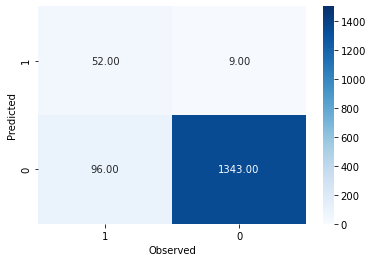

None

Recall: 0.351
Precision: 0.852

F1 Score: 0.498
Roc Auc Score: 0.672


In [95]:
print("Trainig accuracy",round(logreg.score(x_train,y_train),3))  
print("Testing accuracy",round(logreg.score(x_test, y_test),3))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",round(recall_score(y_test,y_predict),3))
print("Precision:",round(precision_score(y_test,y_predict),3))
print()
print("F1 Score:",round(f1_score(y_test,y_predict),3))
print("Roc Auc Score:",round(roc_auc_score(y_test,y_predict),3))

b = round(f1_score(y_test,y_predict),3)

### Pattern C (sklearn, Threshold=0.25)

#### Threshold: 0.25

In [96]:
# Use the concept of threhold as below 
threshold = 0.25
y_predict = np.where(logreg.predict_proba(x_test)[:,1]>threshold,1,0)
y_predict

array([0, 0, 1, ..., 0, 0, 0])

In [97]:
# Observe the predicted and observed classes in a dataframe.
z = x_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Loan Status,Predicted Loan Status
4996,30,4.0,15,4,0.4,1,85,0,0,1,0,0,0
4419,42,17.0,85,1,3.7,3,272,0,0,0,0,0,0
3000,40,14.0,164,1,4.3,2,0,0,0,0,0,1,1
4715,65,39.0,35,1,0.5,3,150,0,0,1,0,0,0
2264,35,11.0,9,4,0.7,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,63,38.0,32,1,1.5,2,0,0,0,0,0,0,0
3054,45,21.0,134,4,5.5,2,0,0,1,1,1,1,1
2074,52,27.0,81,1,1.3,3,293,0,0,0,1,0,0
1362,31,5.0,85,3,1.6,1,157,0,0,1,1,0,0


Trainig accuracy 0.937
Testing accuracy 0.937

Confusion Matrix


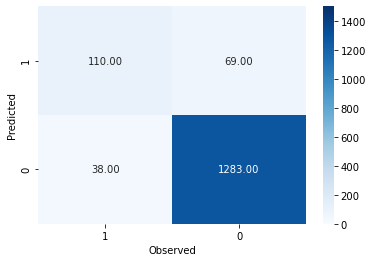

None

Recall: 0.743
Precision: 0.615

F1 Score: 0.673
Roc Auc Score: 0.846


In [98]:
print("Trainig accuracy",round(logreg.score(x_train,y_train),3))  
print("Testing accuracy",round(logreg.score(x_test, y_test),3))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",round(recall_score(y_test,y_predict),3))
print("Precision:",round(precision_score(y_test,y_predict),3))
print()
print("F1 Score:",round(f1_score(y_test,y_predict),3))
print("Roc Auc Score:",round(roc_auc_score(y_test,y_predict),3))

c = round(f1_score(y_test,y_predict),3)

### Find the best threshold for F1 Score

In [99]:
n = 100

In [100]:
threshold_a = np.zeros(n)

In [101]:
print(threshold_a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [102]:
for i in range(n):
    threshold_a[i]=i/n

In [103]:
y_predict_m = np.array([])
recall_a = np.zeros(n)
precision_a = np.zeros(n)
f1_a = np.zeros(n)
roc_auc_a = np.zeros(n)

In [104]:
for i in range(n):
    threshold_a[i]=i/n
    
    y_predict = np.where(logreg.predict_proba(x_test)[:,1]>threshold_a[i],1,0)
    y_predict_m = np.vstack([y_predict_m, y_predict]) if y_predict_m.size else y_predict

In [105]:
for i in range(n):
    recall_a[i] = recall_score(y_test, y_predict_m[i])
    precision_a[i] = precision_score(y_test, y_predict_m[i])
    f1_a[i] = f1_score(y_test,y_predict_m[i])
    roc_auc_a[i] = roc_auc_score(y_test,y_predict_m[i])

#### Recall

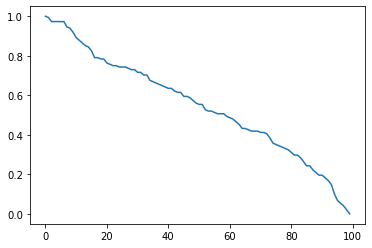

In [106]:
plt.plot(recall_a);

In [107]:
np.argmax(recall_a, axis=0)

0

In [108]:
print("Note: Recall will be max when the threshold is", np.argmax(recall_a, axis=0))

Note: Recall will be max when the threshold is 0


#### Precision

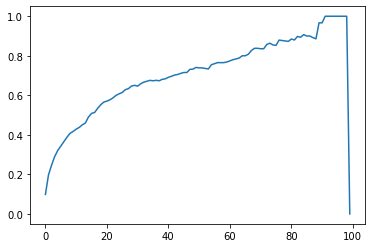

In [109]:
plt.plot(precision_a);

In [110]:
np.argmax(precision_a, axis=0)

91

In [111]:
print("Note: Precision will be max when the threshold is", np.argmax(precision_a, axis=0))

Note: Precision will be max when the threshold is 91


#### F1 Score

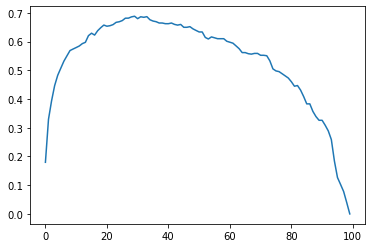

In [112]:
plt.plot(f1_a);

In [113]:
np.argmax(f1_a, axis=0)

29

In [114]:
round(f1_a.max(),3)

0.688

In [115]:
print("Note: F1 Score will be max when the threshold is", np.argmax(f1_a, axis=0))

Note: F1 Score will be max when the threshold is 29


#### ROC AUC Score

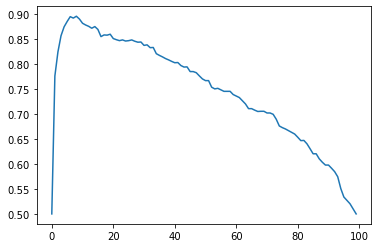

In [116]:
plt.plot(roc_auc_a);

In [117]:
np.argmax(roc_auc_a, axis=0)

8

In [118]:
round(roc_auc_a.max(),3)

0.895

In [119]:
print("Note: ROC AUC Score will be max when the threshold is", np.argmax(roc_auc_a, axis=0))

Note: ROC AUC Score will be max when the threshold is 8


### Pattern D (sklearn, Threshold=Best for F1 Score)

In [120]:
### F1 Score max ###
print("Threshold ", np.argmax(f1_a, axis=0)/100, "(F1 Score max)")

Threshold  0.29 (F1 Score max)


Confusion Matrix -Threshold:  0.29


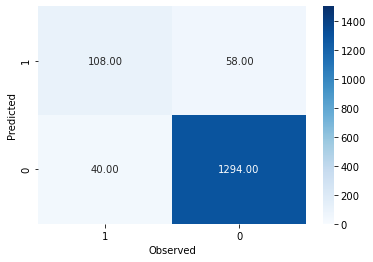

None

Recall: 0.73
Precision: 0.651

F1 Score: 0.688
Roc Auc Score: 0.843


In [121]:
threshold = np.argmax(f1_a, axis=0) / 100
y_predict = np.where(logreg.predict_proba(x_test)[:,1]>threshold,1,0)
print('Confusion Matrix -Threshold: ', threshold)
print(draw_cm(y_test,y_predict))
print()
print("Recall:",round(recall_score(y_test,y_predict),3))
print("Precision:",round(precision_score(y_test,y_predict),3))
print()
print("F1 Score:",round(f1_score(y_test,y_predict),3))
print("Roc Auc Score:",round(roc_auc_score(y_test,y_predict),3))

d = round(f1_score(y_test,y_predict),3)

### Pattern E (sklearn, Threshold=Best for ROC AUC Score)

In [122]:
### ROC AUC Score max ###
print("Threshold ", np.argmax(roc_auc_a, axis=0)/100, "(ROC AUC Score max)")

Threshold  0.08 (ROC AUC Score max)


Confusion Matrix -Threshold:  0.08


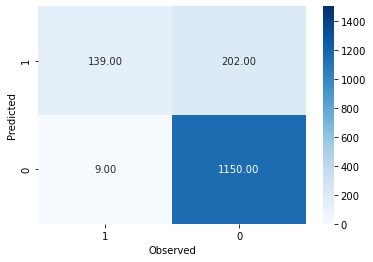

None

Recall: 0.939
Precision: 0.408

F1 Score: 0.569
Roc Auc Score: 0.895


In [123]:
threshold = np.argmax(roc_auc_a, axis=0)/100
y_predict = np.where(logreg.predict_proba(x_test)[:,1]>threshold,1,0)
print('Confusion Matrix -Threshold: ', threshold)
print(draw_cm(y_test,y_predict))
print()
print("Recall:",round(recall_score(y_test,y_predict),3))
print("Precision:",round(precision_score(y_test,y_predict),3))
print()
print("F1 Score:",round(f1_score(y_test,y_predict),3))
print("Roc Auc Score:",round(roc_auc_score(y_test,y_predict),3))

e = round(f1_score(y_test,y_predict),3)

### Try Stats models

In [124]:
# Build the logistic regression models using statsmodel
import statsmodels.api as sm
logit = sm.Logit(y_train,sm.add_constant(x_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.128387
         Iterations 9


In [125]:
# Summary of logistic regression with threhold 0.5
stats.chisqprob = lambda chisq,df: stats.chi2.sf(chisq,df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           11
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                  0.5907
Time:                        21:47:40   Log-Likelihood:                -449.23
converged:                       True   LL-Null:                       -1097.6
Covariance Type:            nonrobust   LLR p-value:                2.211e-271
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.2060      1.236    -12.298      0.000     -17.629     -12.783
Age                    0.0679      0.037      1.811      0.070      -0.006       0.141
Experience          

In [126]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3499 entries, 1335 to 235
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3499 non-null   int64  
 1   Experience          3499 non-null   float64
 2   Income              3499 non-null   int64  
 3   Family              3499 non-null   int64  
 4   CCAvg               3499 non-null   float64
 5   Education           3499 non-null   int64  
 6   Mortgage            3499 non-null   int64  
 7   Securities Account  3499 non-null   int64  
 8   CD Account          3499 non-null   int64  
 9   Online              3499 non-null   int64  
 10  CreditCard          3499 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 328.0 KB


In [127]:
#calct odds ratio, prob
##create dataframe to collate odds ration, prob and p value of coeff
lgcoef = pd.DataFrame(lg.params,columns=['coef'])
lgcoef.loc[:,"Odds_ratio"]=np.exp(lgcoef.coef)
lgcoef['probability']=lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format ='{:.2f}'.format

In [128]:
# Filter by significant p value(p val < 0.05) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio",ascending=False)
pval_filter=lgcoef['pval']<=0.05
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account,3.41,30.38,0.97,0.00
Education,1.65,5.23,0.84,0.00
Family,0.73,2.07,0.67,0.00
CCAvg,0.10,1.11,0.53,0.03
Income,0.05,1.06,0.51,0.00
Online,-0.46,0.63,0.39,0.02
Securities Account,-0.77,0.46,0.32,0.03
CreditCard,-1.02,0.36,0.27,0.00
const,-15.21,0.00,0.00,0.00


### Pattern F (statsmodel)

In [129]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1')
grid_clf_acc.fit(x_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(x_test)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_acc),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_acc),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_acc),3)))
print('F1 Score : ' + str(round(f1_score(y_test,y_pred_acc),3)))
print('Best Solver : ' + str(grid_clf_acc.best_params_))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

f = round(f1_score(y_test,y_pred_acc),3)

Accuracy Score : 0.947
Precision Score : 0.821
Recall Score : 0.588
F1 Score : 0.685
Best Solver : {'solver': 'newton-cg'}


#### Insights:
As the result of the analysis using statsmodel, the best solver is 'newton-cg'and<br>
"CD Account", "Education", "CreditCard", "Family" and "Securities Account"<br>
seem to be top 5 features which influence the model's output, based on the coefficients value.

### Summary and Conclusion

Following is the comparison of each cases:

In [130]:
print("Pattern A (sklearn, Threshold=0.5(default)) -> F1 Score:", a)
print("Pattern B (sklearn, Threshold=0.75) -> F1 Score:", b)
print("Pattern C (sklearn, Threshold=0.25) -> F1 Score:", c)
print("Pattern D (sklearn, Threshold=0.29 (Best for F1 Score)) -> F1 Score:", d)
print("Pattern E (sklearn, Threshold=0.08 (Best for ROC AUC Score)) -> F1 Score:", e)
print("Pattern F (statsmodel) -> F1 Score:", f)

Pattern A (sklearn, Threshold=0.5(default)) -> F1 Score: 0.633
Pattern B (sklearn, Threshold=0.75) -> F1 Score: 0.498
Pattern C (sklearn, Threshold=0.25) -> F1 Score: 0.673
Pattern D (sklearn, Threshold=0.29 (Best for F1 Score)) -> F1 Score: 0.688
Pattern E (sklearn, Threshold=0.08 (Best for ROC AUC Score)) -> F1 Score: 0.569
Pattern F (statsmodel) -> F1 Score: 0.685


Based on the comparison with different threshold using sklearn and statsmodel, using sklearn with Threshold=0.29 has highest F1 Score.

Other matrics are following which is also good.<br>
Recall: 0.73<br>
Precision: 0.651<br>
F1 Score: 0.688<br>
Roc Auc Score: 0.843<br>